In [2]:
import yfinance as yf
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [4]:
ibm_walmart = yf.download(tickers = 'wmt ibm', period = '5y', interval = '1d', rounding = True)
ibm_walmart

[*********************100%***********************]  2 of 2 completed


Price        Close            High             Low            Open          \
Ticker         IBM     WMT     IBM     WMT     IBM     WMT     IBM     WMT   
Date                                                                         
2020-09-14   94.06   42.70   95.05   43.87   93.80   42.25   94.27   42.33   
2020-09-15   94.33   42.71   95.07   43.24   94.17   42.50   94.62   42.98   
2020-09-16   95.70   42.37   96.93   43.12   94.53   42.30   94.53   43.04   
2020-09-17   96.24   42.50   96.72   42.78   93.96   41.98   94.47   42.11   
2020-09-18   94.57   42.07   96.24   42.76   94.49   41.90   95.73   42.42   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2025-09-08  256.09  102.28  257.15  102.36  247.02  100.42  248.63  100.85   
2025-09-09  259.11  102.29  260.66  102.49  254.88  101.55  256.12  102.00   
2025-09-10  256.88  100.41  260.08  102.45  254.56  100.39  259.65  101.95   
2025-09-11  257.01  102.65  258.55  102.78  255.66  100.28  257.56  100.99   
2025-09-12  253.44  103.49  257.25  103.98  252.43  102.36  256.95  102.54   

Price        Volume            
Ticker          IBM       WMT  
Date                           
2020-09-14  3809009  45733800  
2020-09-15  3049299  30427800  
2020-09-16  3962666  27860400  
2020-09-17  3317180  37245000  
2020-09-18  5639614  54709200  
...             ...       ...  
2025-09-08  6940300  13685700  
2025-09-09  4931100  11819700  
2025-09-10  5185400  17934900  
2025-09-11  3576000  15900800  
2025-09-12  3431100  11640100  

[1256 rows x 10 columns]

In [6]:
ibm_walmart = ibm_walmart['Close']
ibm_walmart

Ticker,IBM,WMT
Date,,
2020-09-14,94.06,42.70
2020-09-15,94.33,42.71
2020-09-16,95.70,42.37
2020-09-17,96.24,42.50
2020-09-18,94.57,42.07
...,...,...
2025-09-08,256.09,102.28
2025-09-09,259.11,102.29
2025-09-10,256.88,100.41


<function matplotlib.pyplot.show(close=None, block=None)>

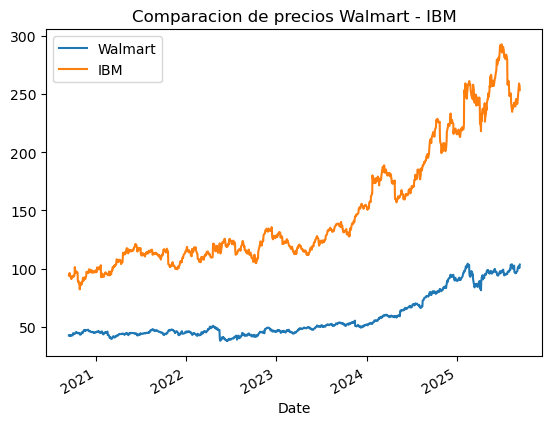

In [8]:
ibm_walmart['WMT'].plot()
ibm_walmart['IBM'].plot()
plt.legend(['Walmart', 'IBM'])
plt.title('Comparacion de precios Walmart - IBM')
plt.show

In [12]:
rend_ibm_walmart = ibm_walmart.pct_change()
rend_ibm_walmart = rend_ibm_walmart.dropna()
rend_ibm_walmart

Ticker,IBM,WMT
Date,,
2020-09-15,0.002871,0.000234
2020-09-16,0.014523,-0.007961
2020-09-17,0.005643,0.003068
2020-09-18,-0.017352,-0.010118
2020-09-21,-0.020408,0.013073
...,...,...
2025-09-08,0.030419,0.017610
2025-09-09,0.011793,0.000098
2025-09-10,-0.008606,-0.018379


In [14]:
correlacion = rend_ibm_walmart['WMT'].corr(rend_ibm_walmart['IBM'])
print("Correlacion entre Walmart y IBM", correlacion)

Correlacion entre Walmart y IBM 0.2175162483626146


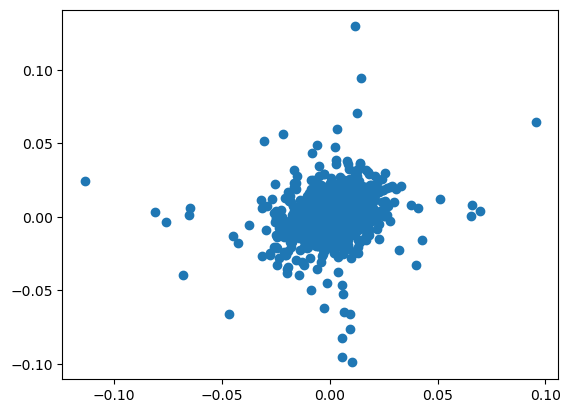

In [16]:
# Crear grafico de dispersion
plt.scatter(rend_ibm_walmart['WMT'], rend_ibm_walmart['IBM'])
plt.show()

In [18]:
# Modelo de regresion simple
import statsmodels.api as sm
rend_ibm_walmart = sm.add_constant(rend_ibm_walmart)
rend_ibm_walmart

,const,IBM,WMT
Date,,,
2020-09-15,1.0,0.002871,0.000234
2020-09-16,1.0,0.014523,-0.007961
2020-09-17,1.0,0.005643,0.003068
2020-09-18,1.0,-0.017352,-0.010118
2020-09-21,1.0,-0.020408,0.013073
...,...,...,...
2025-09-08,1.0,0.030419,0.017610
2025-09-09,1.0,0.011793,0.000098
2025-09-10,1.0,-0.008606,-0.018379


In [20]:
regresion = sm.OLS(rend_ibm_walmart['WMT'], rend_ibm_walmart[['const', 'IBM']]).fit()
print(regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     62.23
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           6.62e-15
Time:                        19:42:10   Log-Likelihood:                 3703.8
No. Observations:                1255   AIC:                            -7404.
Df Residuals:                    1253   BIC:                            -7393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.732      0.0

In [26]:
walmart = ibm_walmart['WMT']
ibm = ibm_walmart['IBM']

In [28]:
# Prueba Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
import numpy as np

resultado_wmt = adfuller(walmart)
print("El valor p de la prueba para Walmart es: " + str(resultado_wmt[1]))

resultado_ibm = adfuller(ibm)
print("El valor p de la prueba para IBM es: " + str(resultado_ibm[1]))

El valor p de la prueba para Walmart es: 0.9971585516551154
El valor p de la prueba para IBM es: 0.9580224456565243


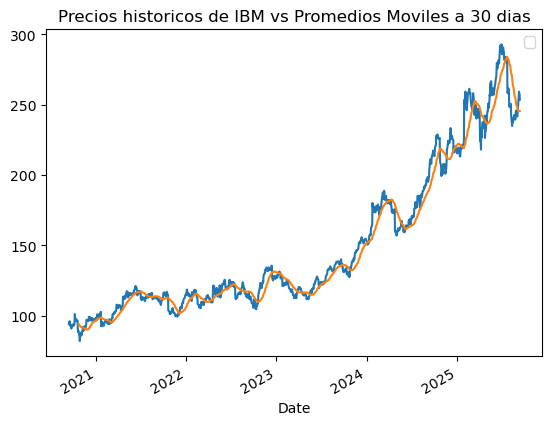

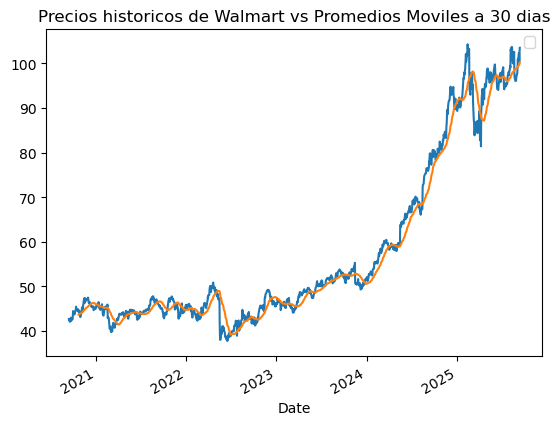

In [32]:
# Graficacion de la media movil para IBM
rolling_ibm = ibm.rolling(30).mean()
ibm.plot()
rolling_ibm.plot()
plt.title("Precios historicos de IBM vs Promedios Moviles a 30 dias")
plt.legend(['IBM'], ['Media Movil'])
plt.show()

# Graficacion de la media movil para Walmart
rolling_walmart = walmart.rolling(30).mean()
walmart.plot()
rolling_walmart.plot()
plt.title("Precios historicos de Walmart vs Promedios Moviles a 30 dias")
plt.legend(['Walmart'], ['Media Movil'])
plt.show()

In [46]:
print(walmart.shape)
print(ibm.shape)

(1256,)
(1256,)


In [50]:
len_train = int(1256 * 0.8)
len_train

1004

In [110]:
# Definicion de grupos de entrenamiento Walmart
train_wmt = walmart[0 : len_train]
test_wmt = walmart[len_train :]

# Definimos las variables
y_pred_wmt = walmart.copy()
y_pred_wmt = pd.DataFrame(y_pred_wmt)

y_pred_wmt['Pronostico'] = walmart.rolling(30).mean()
y_pred_wmt[0:35]

# Pronostico para el siguiente dia
y_pred_wmt.tail(1)['Pronostico']

Date
2025-09-12    100.170333
Name: Pronostico, dtype: float64

In [84]:
# Definicion de grupos de entrenamiento Walmart
train_ibm = ibm[0 : len_train]
test_ibm = ibm[len_train :]

# Definimos las variables
y_pred_ibm = ibm.copy()
y_pred_ibm = pd.DataFrame(y_pred_ibm)

y_pred_ibm['Pronostico'] = ibm.rolling(30).mean()
y_pred_ibm[0:35]

# Pronostico para el siguiente dia
y_pred_ibm.tail(1)['Pronostico']

Date
2025-09-12    245.389667
Name: Pronostico, dtype: float64

In [124]:
y_pred_wmt2 = pd.DataFrame(y_pred_wmt['Pronostico'][1004:])
test_wmt = pd.DataFrame(test_wmt)

y_pred_ibm2 = pd.DataFrame(y_pred_ibm['Pronostico'][1004:])
test_ibm = pd.DataFrame(test_ibm)

rmse_wmt = np.sqrt(mean_squared_error(test_wmt, y_pred_wmt2)).round(2)
mape_wmt = np.round(np.mean(np.abs((test_wmt['WMT'] - y_pred_wmt2['Pronostico'])/test_wmt['WMT'])) * 100, 2)

rmse_ibm = np.sqrt(mean_squared_error(test_ibm, y_pred_ibm2)).round(2)
mape_ibm = np.round(np.mean(np.abs((test_ibm['IBM'] - y_pred_ibm2['Pronostico'])/test_ibm['IBM'])) * 100, 2)

In [126]:
print("RMSE Walmart =", rmse_wmt, "MAPE Walmart =", mape_wmt)
print("RMSE IBM =", rmse_ibm, "MAPE IBM =", mape_ibm)

RMSE Walmart = 4.52 MAPE Walmart = 3.87
RMSE IBM = 14.84 MAPE IBM = 5.12


# Conclusion:
1. No existe correlacion entre las dos compañias, ya que vemos el grafico con una concentracion en el centro (0, 0).
2. Podemos tener cierto grado de confianza en los pronosticos que obtuvimos para el dia siguiente, ya que vemos un RMSE y un MAPE muy bajos en relacion al precio pronosticado en cada uno de las compañias.